In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(filepath_or_buffer='rome_listing.csv')

In [3]:
df

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2737,https://www.airbnb.com/rooms/2737,20240322023345,2024-03-22,city scrape,"Elif's room in cozy, clean flat.",10 min by bus you can get to Piazza Venezia or...,It used to be an industrial area until late 80...,https://a0.muscache.com/pictures/41225252/e955...,3047,...,5.00,4.40,4.40,NaN,f,6,0,6,0,0.04
1,139330,https://www.airbnb.com/rooms/139330,20240322023345,2024-03-22,city scrape,abbraccia Morfeo (2b),"""Abbraccia Morfeo"" is a two-story villa with a...",NaN,https://a0.muscache.com/pictures/bbb5c913-9483...,679555,...,4.92,4.15,4.88,Aut. Comune di Roma QA 2016/160 del 04/01/2016...,t,4,0,4,0,0.29
2,3079,https://www.airbnb.com/rooms/3079,20240322023345,2024-03-23,city scrape,Cozy apartment (2-4)with Colisseum view,With the view of the Colisseum from the front ...,Monti neighborhood is one of the best areas in...,https://a0.muscache.com/pictures/miso/Hosting-...,3504,...,4.86,4.81,4.43,NaN,f,6,6,0,0,0.13
3,140801,https://www.airbnb.com/rooms/140801,20240322023345,2024-03-22,city scrape,"Rome Studio Rental, Colosseum","Recently renovated, the studio has an entry fr...",....,https://a0.muscache.com/pictures/892e7c20-8449...,685600,...,4.90,4.87,4.72,NaN,f,1,1,0,0,1.26
4,11834,https://www.airbnb.com/rooms/11834,20240322023345,2024-03-23,city scrape,"Rome ""Charming Boschetto Studio""",The apartment is located on the ground floor o...,"""Monti"" with its narrow cobblestone alleys, cr...",https://a0.muscache.com/pictures/miso/Hosting-...,44552,...,4.95,4.99,4.77,NaN,f,1,1,0,0,1.43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30313,1115111824821147112,https://www.airbnb.com/rooms/1115111824821147112,20240322023345,2024-03-22,city scrape,RomAntica Vatican Suites - Tripla con Balcone,The structure is located in the beating heart ...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,567008210,...,NaN,NaN,NaN,NaN,t,4,0,4,0,NaN
30314,1115129751426561528,https://www.airbnb.com/rooms/1115129751426561528,20240322023345,2024-03-22,city scrape,Appartamento Colli [3m metro],A charming one-bedroom apartment in the heart ...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,469927650,...,NaN,NaN,NaN,NaN,t,1,1,0,0,NaN
30315,1115137420123527360,https://www.airbnb.com/rooms/1115137420123527360,20240322023345,2024-03-23,city scrape,Antica Trastevere,"Relax in this quiet, centrally-located space.<...",NaN,https://a0.muscache.com/pictures/miso/Hosting-...,11290250,...,NaN,NaN,NaN,NaN,t,2,2,0,0,NaN
30316,1115144474654928427,https://www.airbnb.com/rooms/1115144474654928427,20240322023345,2024-03-22,city scrape,[Conca D'Oro] Elegante e Luminoso: Metro Adiac...,Located in the lively neighborhood of Conca D'...,"Il quartiere di Conca D'Oro, oltre a offrire u...",https://a0.muscache.com/pictures/miso/Hosting-...,515640179,...,NaN,NaN,NaN,31018,t,7,7,0,0,NaN


In [4]:
# we can drop columns that are not useful for our analysis
columns_to_drop = [
    "id", "scrape_id", "last_scraped", "source", "name", "picture_url",
    "neighborhood_overview", "picture_url", "host_name", "host_location",
    "host_about", "host_thumbnail_url", "host_picture_url",
    "host_neighbourhood", "host_listings_count", "host_total_listings_count",
    "host_verifications", "host_has_profile_pic", "host_identity_verified",
    "host_url", "host_since", 'host_response_time', 'host_response_rate',
    'host_acceptance_rate', "neighbourhood_group_cleansed", "neighbourhood",
    'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
    'maximum_minimum_nights', 'minimum_maximum_nights',
    'maximum_maximum_nights', 'minimum_nights_avg_ntm',
    'maximum_nights_avg_ntm', 'calendar_updated', 'has_availability',
    'availability_30', 'availability_60', 'availability_90',
    'availability_365', 'calendar_last_scraped', 'first_review',
    'last_review', 'instant_bookable',
    'calculated_host_listings_count',
    'calculated_host_listings_count_entire_homes',
    'calculated_host_listings_count_private_rooms',
    'calculated_host_listings_count_shared_rooms', 'host_id', "amenities", "description", 'listing_url'
]

df.drop(labels=columns_to_drop, axis=1, inplace=True)

In [5]:
df.head()

,host_is_superhost,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,...,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,reviews_per_month
0,t,VIII Appia Antica,41.871360,12.482150,Private room,Private room,1,1.5,1.5 baths,1.0,...,0,4.80,4.60,4.60,4.80,5.00,4.40,4.40,NaN,0.04
1,f,V Prenestino/Centocelle,41.881420,12.544220,Private room in bed and breakfast,Private room,2,1.0,1 private bath,1.0,...,0,4.77,4.88,4.88,4.96,4.92,4.15,4.88,Aut. Comune di Roma QA 2016/160 del 04/01/2016...,0.29
2,f,I Centro Storico,41.895000,12.491170,Entire rental unit,Entire home/apt,4,1.0,1 bath,1.0,...,0,4.53,4.38,4.62,4.71,4.86,4.81,4.43,NaN,0.13
3,f,I Centro Storico,41.887390,12.496900,Entire vacation home,Entire home/apt,2,1.0,1 bath,1.0,...,1,4.72,4.83,4.74,4.89,4.90,4.87,4.72,NaN,1.26
4,t,I Centro Storico,41.895447,12.491181,Entire rental unit,Entire home/apt,2,1.0,1 bath,1.0,...,3,4.83,4.83,4.91,4.98,4.95,4.99,4.77,NaN,1.43


In [6]:
df.columns

Index(['host_is_superhost', 'neighbourhood_cleansed', 'latitude', 'longitude',
       'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'price', 'number_of_reviews',
       'number_of_reviews_ltm', 'number_of_reviews_l30d',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'license', 'reviews_per_month'],
      dtype='object')

In [7]:
df.price = df.price.str.replace(pat='$', repl='').str.replace(pat=',', repl='').astype(dtype=float)

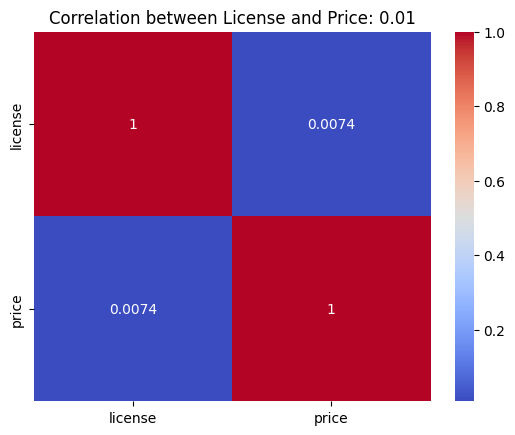

<Axes: xlabel='license', ylabel='price'>

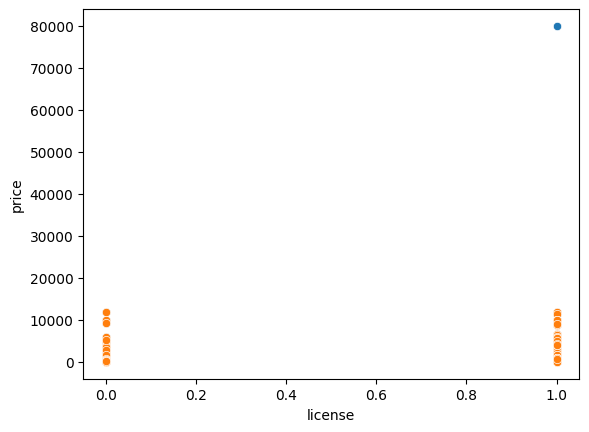

In [8]:
# Does License have an impact on the price?

df_l = df[["license", "price"]].copy()
df_l["license"] = df_l["license"].isna()
df_l = df_l[~df_l["price"].isna()]

correlation = df_l["license"].corr(df_l["price"])
sns.heatmap(df_l[["license", "price"]].corr(), annot=True, cmap="coolwarm")
plt.title(f"Correlation between License and Price: {correlation:.2f}")
plt.show()

sns.scatterplot(data=df_l, x='license', y='price')

# remove outliers
df_l = df_l[df_l["price"] < 30000]
sns.scatterplot(data=df_l, x='license', y='price')

In [9]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Display basic information about the dataset
print(df.info())

# Summary statistics
print(df.describe())

# Check for missing values
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30318 entries, 0 to 30317
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   host_is_superhost            30191 non-null  object 
 1   neighbourhood_cleansed       30318 non-null  object 
 2   latitude                     30318 non-null  float64
 3   longitude                    30318 non-null  float64
 4   property_type                30318 non-null  object 
 5   room_type                    30318 non-null  object 
 6   accommodates                 30318 non-null  int64  
 7   bathrooms                    26724 non-null  float64
 8   bathrooms_text               30273 non-null  object 
 9   bedrooms                     29305 non-null  float64
 10  beds                         26649 non-null  float64
 11  price                        26683 non-null  float64
 12  number_of_reviews            30318 non-null  int64  
 13  number_of_review

In [10]:
# drop rows with missing values in the price column
df = df.dropna(subset=['price'])
# remove license column
df.drop(columns=['license'], inplace=True)

/tmp/ipykernel_37777/486084412.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['license'], inplace=True)


In [11]:
# We only care if the bathroom is shared or not
df["bathrooms_shared"] = df["bathrooms_text"].str.contains("shared", case=False)
df["bathrooms_shared"] = df["bathrooms_shared"].astype(bool)
# drop the original column
df.drop(columns=['bathrooms_text'], inplace=True)

# convert the host_is_superhost column to a boolean
df["host_is_superhost"] = df["host_is_superhost"].str.contains("t", case=False)
df["host_is_superhost"] = df["host_is_superhost"].astype(bool)

/tmp/ipykernel_37777/2314257517.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["bathrooms_shared"] = df["bathrooms_text"].str.contains("shared", case=False)
/tmp/ipykernel_37777/2314257517.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["bathrooms_shared"] = df["bathrooms_shared"].astype(bool)
/tmp/ipykernel_37777/2314257517.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-d

In [12]:
# TODO exploratory data analysis
# TODO feature selection / engineering
# TODO model selection

In [13]:
# # Create a set of all amenities
# df["amenities"] = df["amenities"].str.replace(pat='[{}"]', repl='').str.replace(pat='[",]', repl=' ').str.strip('[]').str.replace('"', '')
# amenities = set()
# for row in df["amenities"]:
#     elements = row.split(',')
#     print(elements)
#     amenities.update(elements)

# len(amenities)

In [14]:
# amenities = set([a.lower() if not 'wifi' in a.lower() else 'wifi' for a in amenities])
# amenities = set([a.lower() if not 'parking' in a.lower() and not 'carport' in a.lower() else 'parking' for a in amenities])
# amenities = set([a.lower() if not 'kitchen' in a.lower() else 'kitchen' for a in amenities])
# amenities = set([a.lower() if not 'washer' in a.lower() else 'washer' for a in amenities])
# amenities = set([a.lower() if not 'dryer' in a.lower() and not 'hair dryer' in a.lower() else 'dryer' for a in amenities])
# amenities = set([a.lower() if not 'tv' in a.lower() else 'tv' for a in amenities])
# amenities = set([a.lower() if not 'heating' in a.lower() else 'heating' for a in amenities])
# amenities = set([a.lower() if not 'air conditioning' in a.lower() else 'air conditioning' for a in amenities])
# amenities = set([a.lower() if not 'refrigerator' in a.lower() else 'refrigerator' for a in amenities])
# amenities = set([a.lower() if not 'microwave' in a.lower() else 'microwave' for a in amenities])
# amenities = set([a.lower() if not 'oven' in a.lower() else 'oven' for a in amenities])
# amenities = set([a.lower() if not 'coffee maker' in a.lower() and not 'coffee machine' in a.lower() else 'coffee maker' for a in amenities])
# amenities = set([a.lower() if not any (x in a.lower() for x in ['body soap', 'bagnoschiuma', 'saponi', 'nivea', 'detergenti mani', 'bagnoschiuma', 'shampoo', 'soap', 'sapone']) else 'soap' for a in amenities])
# amenities = set([a.lower() if not 'sound system' in a.lower() else 'sound system' for a in amenities])
# amenities = set([a.lower() if not 'stove' in a.lower() else 'stove' for a in amenities])
# amenities = set([a.lower() if not 'air conditioning' in a.lower() and not 'airconditioning' in a.lower() and not 'ac - split type ductless system' in a.lower()  and not 'ceiling fan' in a.lower() else 'stove' for a in amenities])
# amenities = set([a.lower() if not 'conditioner' in a.lower() else 'conditioner' for a in amenities])
# amenities = set([a.lower() if not 'high chair' in a.lower() else 'high chair' for a in amenities])
# amenities = set([a.lower() if not 'grill' in a.lower() else 'grill' for a in amenities])
# amenities = set([a.lower() if not 'pool' in a.lower() else 'pool' for a in amenities])
# amenities = set([a.lower() if not 'baby bath' in a.lower() else 'pool' for a in amenities])
# amenities = set([a.lower() if not 'crib' in a.lower() else 'crib' for a in amenities])
# amenities = set([a.lower() if not 'garden' in a.lower() else 'garden' for a in amenities])
# amenities = set([a.lower() if not 'patio' in a.lower() else 'patio' for a in amenities])
# amenities = set([a.lower() if not 'fireplace' in a.lower() else 'fireplace' for a in amenities])
# amenities = set([a.lower() if not 'hangers' in a.lower() else 'hangers' for a in amenities])
# amenities = set([a.lower() if not 'stereo' in a.lower() else 'stereo' for a in amenities])
# amenities = set([a.lower() if not 'stereo' in a.lower() else 'stereo' for a in amenities])
# amenities = set([a.lower() if not any (x in a.lower() for x in ['console', 'xbox', 'playstation', 'game', 'ps3']) else 'console' for a in amenities])
# amenities = set([a.lower() if not 'housekeeping' in a.lower() else 'housekeeping' for a in amenities])
# amenities = set([a.lower() if not 'gym' in a.lower() else 'gym' for a in amenities])
# amenities = set([a.lower() if not 'breakfast' in a.lower() else 'breakfast' for a in amenities])
# amenities = set([a.lower() if not 'baby monitor' in a.lower() else 'baby monitor' for a in amenities])
# amenities = set([a.lower() if not 'books and toys' in a.lower() else 'books and toys' for a in amenities])
# amenities = set([a.lower() if not 'window ac' in a.lower() else 'air conditioning' for a in amenities])
# amenities = set([a.lower() if not 'view' in a.lower() else 'view' for a in amenities])
# amenities = set([a.lower() if not 'exercise equipment' in a.lower() else 'exercise equipment' for a in amenities])
# amenities = set([a.lower() if not 'hot tub' in a.lower() else 'hot tub' for a in amenities])

In [15]:
print(df.isnull().sum())

host_is_superhost                 0
neighbourhood_cleansed            0
latitude                          0
longitude                         0
property_type                     0
room_type                         0
accommodates                      0
bathrooms                         7
bedrooms                         19
beds                             82
price                             0
number_of_reviews                 0
number_of_reviews_ltm             0
number_of_reviews_l30d            0
review_scores_rating           3775
review_scores_accuracy         3798
review_scores_cleanliness      3798
review_scores_checkin          3798
review_scores_communication    3798
review_scores_location         3798
review_scores_value            3798
reviews_per_month              3775
bathrooms_shared                  0
dtype: int64


In [16]:
df = df.dropna()

In [17]:
df

,host_is_superhost,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,...,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,bathrooms_shared
0,True,VIII Appia Antica,41.871360,12.482150,Private room,Private room,1,1.5,1.0,1.0,...,0,4.80,4.60,4.60,4.80,5.00,4.40,4.40,0.04,False
1,False,V Prenestino/Centocelle,41.881420,12.544220,Private room in bed and breakfast,Private room,2,1.0,1.0,1.0,...,0,4.77,4.88,4.88,4.96,4.92,4.15,4.88,0.29,False
2,False,I Centro Storico,41.895000,12.491170,Entire rental unit,Entire home/apt,4,1.0,1.0,1.0,...,0,4.53,4.38,4.62,4.71,4.86,4.81,4.43,0.13,False
3,False,I Centro Storico,41.887390,12.496900,Entire vacation home,Entire home/apt,2,1.0,1.0,1.0,...,1,4.72,4.83,4.74,4.89,4.90,4.87,4.72,1.26,False
4,True,I Centro Storico,41.895447,12.491181,Entire rental unit,Entire home/apt,2,1.0,1.0,1.0,...,3,4.83,4.83,4.91,4.98,4.95,4.99,4.77,1.43,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30129,False,I Centro Storico,41.906806,12.480821,Entire rental unit,Entire home/apt,4,2.0,1.0,2.0,...,1,5.00,5.00,5.00,5.00,5.00,5.00,5.00,1.00,False
30140,False,I Centro Storico,41.906100,12.501943,Private room in rental unit,Private room,2,1.0,1.0,1.0,...,1,4.00,5.00,5.00,5.00,5.00,4.00,4.00,1.00,False
30158,True,XII Monte Verde,41.875514,12.466546,Entire rental unit,Entire home/apt,6,2.0,2.0,3.0,...,1,5.00,5.00,5.00,5.00,5.00,4.00,5.00,1.00,False
30246,False,VII San Giovanni/Cinecittà,41.883669,12.509316,Entire rental unit,Entire home/apt,6,2.0,2.0,2.0,...,1,5.00,5.00,5.00,5.00,5.00,5.00,5.00,1.00,False


In [18]:
df.to_csv(('rome_listings_cleaned.csv'), index=False)